# A Gaussian Integral

Checking the following integral using the Montecarlo procedure

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

We need to write our integral in the following way:
$$\int_0^\infty f(x) p(x) dx$$
with $\int_0^\infty p(x)= 1$ .

Let's rewrite it as 
$$ \sqrt{\frac{\pi}{2}}\sigma \int_0^\infty x^3 \frac{2}{\sqrt{2\pi}\sigma} \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx , $$
with $f(x)=x^3$ and $ p(x)= \frac{2}{\sqrt{2\pi}\sigma} \exp\left(-\frac{x^2}{2\sigma^2}\right) $ .

#### We use a gaussian with $\mu = 0 $ and $ \sigma = 3$

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
import random
plt.rcParams['figure.figsize'] = [5, 5]

mu = 0
sigma = 3

print("Expected result of the integral: " + str(2*sigma**4))

Expected result of the integral: 162


#### Now we vary the number of sampling $N \in	[100, 100000]$ to see if the integral converge and how the error changes

$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

In [2]:
def fun(x):
    return x**3

integral = []
difference = []


N = np.arange(100, 100000, 100)
H = np.arange(0, len(N), 1)
for h, n in zip (H, N):
    xi = scipy.stats.halfnorm.rvs(mu, sigma, n)
    integral.append(np.sqrt(np.pi/2)*sigma * np.mean(fun(xi)))
    difference.append(np.abs(integral[h] - (2*sigma**4)))



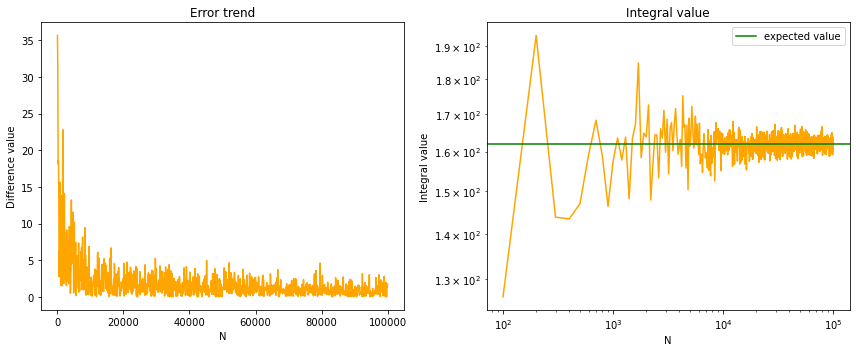

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(N, difference, color='orange')
ax1.set_xlabel('N')
ax1.set_ylabel('Difference value')
ax1.set_title('Error trend')


ax2.plot(N, integral, color='orange')
ax2.axhline(2*sigma**4,c='green', label='expected value')

ax2.set_xlabel('N')
ax2.set_ylabel('Integral value')
ax2.set_title('Integral value')
ax2.legend()
ax2.loglog()

fig.tight_layout()
plt.show()

#### Same value of $N$ but many times, $ M = 1000$
#### Large $ N = 10000$

In [4]:
from tqdm import tqdm
mu = 0
sigma = 3 

integral_2 = []
difference_2 = []

N = 10000
M = 10000 #number of iteration

for h in tqdm(range (M)):
    xi = scipy.stats.halfnorm.rvs(mu, sigma, N)
    integral_2.append(np.sqrt(np.pi/2)*sigma * np.mean(fun(xi)))
    difference_2.append(np.abs(integral_2[h] - (2*sigma**4)))



100%|██████████| 10000/10000 [00:08<00:00, 1159.03it/s]


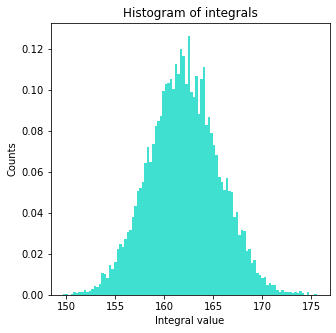

In [5]:
bins = int(np.round(np.sqrt(10000)))
Counts,Bins,_ = plt.hist( integral_2, bins, density=True, color='turquoise')
plt.xlabel('Integral value')
plt.ylabel('Counts')
plt.title('Histogram of integrals')
plt.show()

#### Now we try to fit in a naive way with a parametraized model 

Mean estimated by the fit: 162.0
Standard deviation estimated by the fit: 3.6


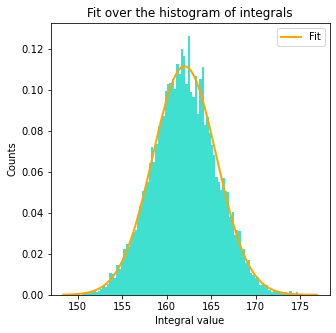

In [6]:
from scipy.stats import norm

bins = int(np.round(np.sqrt(10000)))
Counts,Bins,_ = plt.hist( integral_2, bins, density=True, color='turquoise')

mu, std = norm.fit(integral_2)
print("Mean estimated by the fit: %.1f" %mu)
print("Standard deviation estimated by the fit: %.1f" %std)

#plotting the fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, label='Fit', color='orange') 

plt.xlabel('Integral value')
plt.ylabel('Counts')
plt.title('Fit over the histogram of integrals')

plt.legend() 
plt.show()

#### Low $ N = 10$

In [7]:
mu = 0
sigma = 3

integral_3 = []
difference_3 = []

N = 10
M = 10000

for h in tqdm(range (M)):
    xi = scipy.stats.halfnorm.rvs(mu, sigma, N)
    integral_3.append(np.sqrt(np.pi/2)*sigma * np.mean(fun(xi)))
    difference_3.append(np.abs(integral_3[h] - (2*sigma**4)))


100%|██████████| 10000/10000 [00:00<00:00, 11250.72it/s]


Mean estimated by the fit: 159.9
Standard deviation estimated by the fit: 112.3


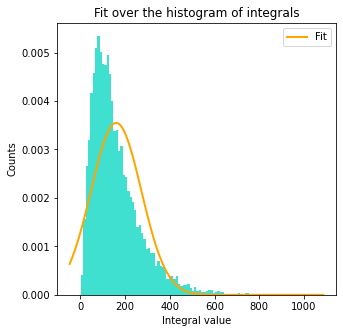

In [8]:
from checkpointing import checkpoint

bins = int(np.round(np.sqrt(10000)))
Counts,Bins,_ = plt.hist( integral_3, bins, density=True, color='turquoise')

mu, std = norm.fit(integral_3)
print("Mean estimated by the fit: %.1f" %mu)
print("Standard deviation estimated by the fit: %.1f" %std)


#plotting the fit
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2, label='Fit', color='orange') 

plt.xlabel('Integral value')
plt.ylabel('Counts')
plt.title('Fit over the histogram of integrals')

plt.legend() 
plt.show()

They are not distributed anymore according to a gaussian